<a href="https://colab.research.google.com/github/WynterAC/PSYC413-Notes/blob/main/Homework_8%20Submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1:
A psychologist studying perceived “quality of life” in a large number of cities came up with the following equation using mean temperature (∘
F) and median income in $1,000 as predictors.
Ŷ =5.37−0.01⋅Temp+0.05⋅Income
Interpret the regression equation in terms of the coefficients. i.e., State what each predictor of the model means in plain English.
  


The regression equation can be interpreted as: 
- The intercept of 5.37 indicates the predicted quality of life score when the temperature and income are both zero. In other words, it represents the baseline quality of life score for a hypothetical city with no income and no temperature.
The coefficient for mean temperature (-0.01) indicates that for every one degree Fahrenheit increase in temperature, the predicted quality of life score decreases by 0.01. This suggests that higher temperatures are associated with lower perceived quality of life in cities.
- The coefficient for median income (0.05) indicates that for every $1,000 increase in median income, the predicted quality of life score increases by 0.05. This suggests that higher incomes are associated with higher perceived quality of life in cities.
> Overall, this regression equation suggests that both temperature and income are important predictors of perceived quality of life in cities. Higher incomes are associated with higher quality of life, while higher temperatures are associated with lower quality of life.

# Question 2:
Using the model from question 1, assume a city has a mean temperature of 55 degrees and a median income of $12,000. What is its predicted Quality of Life score?

In [ ]:

# Assign the given values to variables
temp <- 55
income <- 12

# Compute the predicted Quality of Life score
prediction <- 5.37-(0.01*temp) + (0.05*income)

# Print the predicted Quality of Life score
print(paste("The predicted Quality of Life score is", prediction))



[1] "The predicted Quality of Life score is 5.42"


#Question 3:
You are a highfalutin marketing guru who wants to predict the sales of your brand using the data set DataDrivenMarketing.csv. However, there are a number of missing “NA” values in this data set. Using what you know about R, and (if necessary) your Googling skills, report how many NA values are in each of the dataset’s columns. Note that there are many different ways to achieve this.


In [23]:
# Read the CSV file into a data frame
data <- read.csv("DataDrivenMarketing.csv")

# Count the number of NA values in each column
na_count <- sapply(data, function(x) sum(is.na(x)))

# Print the results
print(na_count)
 

          TV        Radio Social.Media   Influencer        Sales 
           0            8            7            5            5 


#Question 4:
Using the DataDrivenMarketing.csv data, create a dataframe that removes any row which has a NA value. Report how many rows this new dataframe has. There are numerous ways to acheive this (none of which should be overly complicated - so if you are typing lots of code to solve this question, you are doing it wrong). Use this cleaned up data set for all subsequent questions.





In [5]:
# Read the CSV file into a data frame
data <- read.csv("DataDrivenMarketing.csv")

# Remove rows with NA values
clean_data <- na.omit(data)

# Count the number of rows in the cleaned-up data frame
n_rows <- nrow(clean_data)

# Print the number of rows in the cleaned-up data frame
print(n_rows)


[1] 4524


#Question 5:
Plot a correlation matrix of the possible (quantitative) predictors you could include in your model that predicts sales. Make sure the correlation values are also shown either inside the plot or as a seperate output.





In [6]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the ggcorrplot package
library(ggcorrplot)


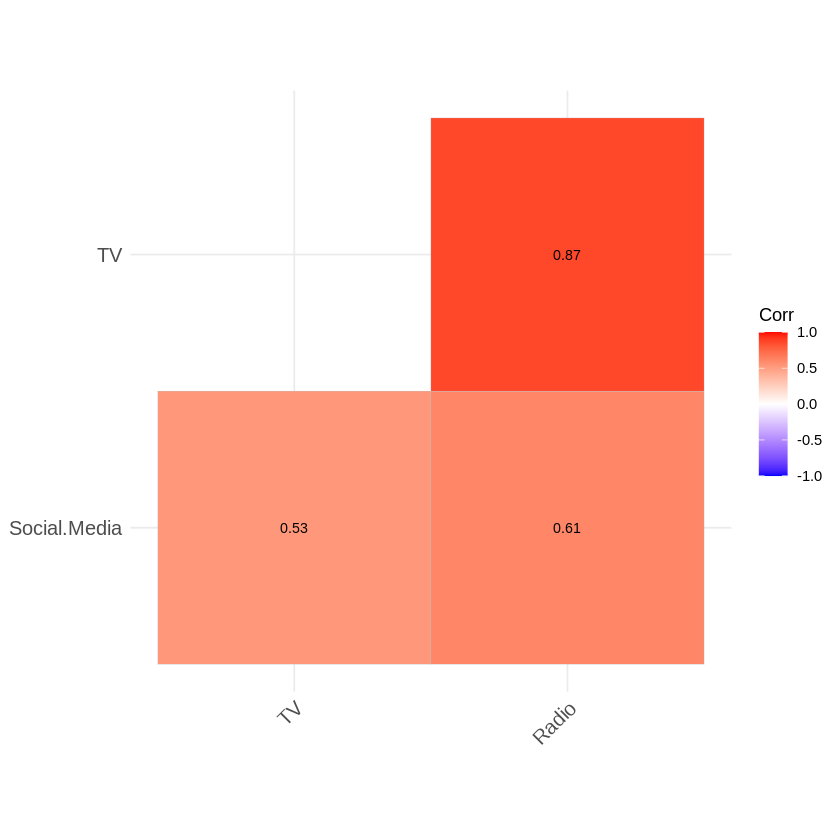

In [7]:
# Convert the quantitative variables to numeric format
clean_data$TV <- as.numeric(clean_data$TV)
clean_data$Radio <- as.numeric(clean_data$Radio)
clean_data$Social.Media <- as.numeric(clean_data$Social.Media)

# Extract the quantitative predictors from the clean data frame
quant_vars <- clean_data[, c("TV", "Radio", "Social.Media")]

# Calculate the correlation matrix
corr_mat <- cor(quant_vars)

# Plot the correlation matrix with values inside the plot
ggcorrplot(corr_mat, hc.order = TRUE, type = "lower", lab = TRUE, lab_size = 3)


#Question 6:
Because multicolinearity appears as though it could be an issue you decide to check the variance inflation factors.
Compare the variance inflation factors of a model with all 3 quantitative predictors
Sales=b0+b1⋅(TV)+b2⋅(Radio)+b3⋅(Social Media)
to a model with just TV and social media
Sales=b0+b1⋅(TV)+b2⋅(Social Media)
Report the VIF scores for each model.





In [2]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [9]:
# Load the 'car' package for VIF calculations
library(car)

# Create the full model with all 3 quantitative predictors
m3p <- lm(Sales ~ TV + Radio + Social.Media, data = clean_data)

# Create the model with just TV and Social Media predictors
m2p <- lm(Sales ~ TV + Social.Media, data = clean_data)

# Calculate the VIF for each predictor in both models
m3p_vif <- vif(m3p)
m2p_vif <- vif(m2p)

# Print the VIF scores for each model
cat("VIF scores for the full model (m3p):\n")
print(m3p_vif)
cat("\n")

cat("VIF scores for the reduced model (m2p):\n")
print(m2p_vif)


VIF scores for the full model (m3p):
          TV        Radio Social.Media 
    4.082129     4.656350     1.578171 

VIF scores for the reduced model (m2p):
          TV Social.Media 
    1.383548     1.383548 


#Question 7:
You want to perform a heirarchal regression. Search for outliers in the TV and Social Media columns. Report how many you find in each and remove them from the data set.





In [14]:
install.packages("ggplot2")
library(ggplot2)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



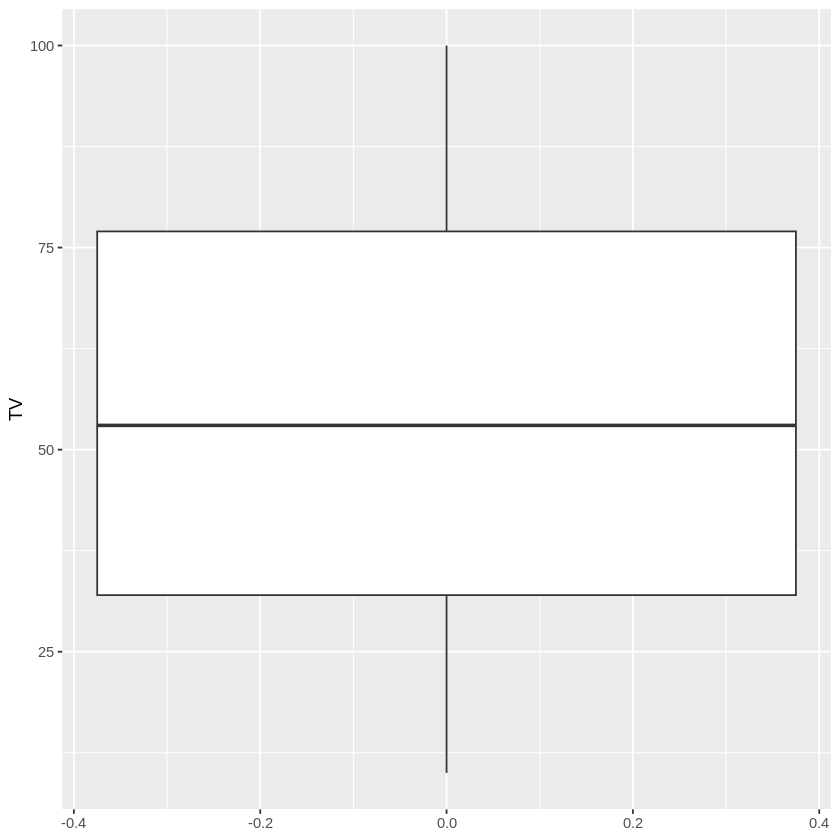

[1] "Number of outliers in TV column:  0"
[1] "Number of outliers in Social Media column:  28"


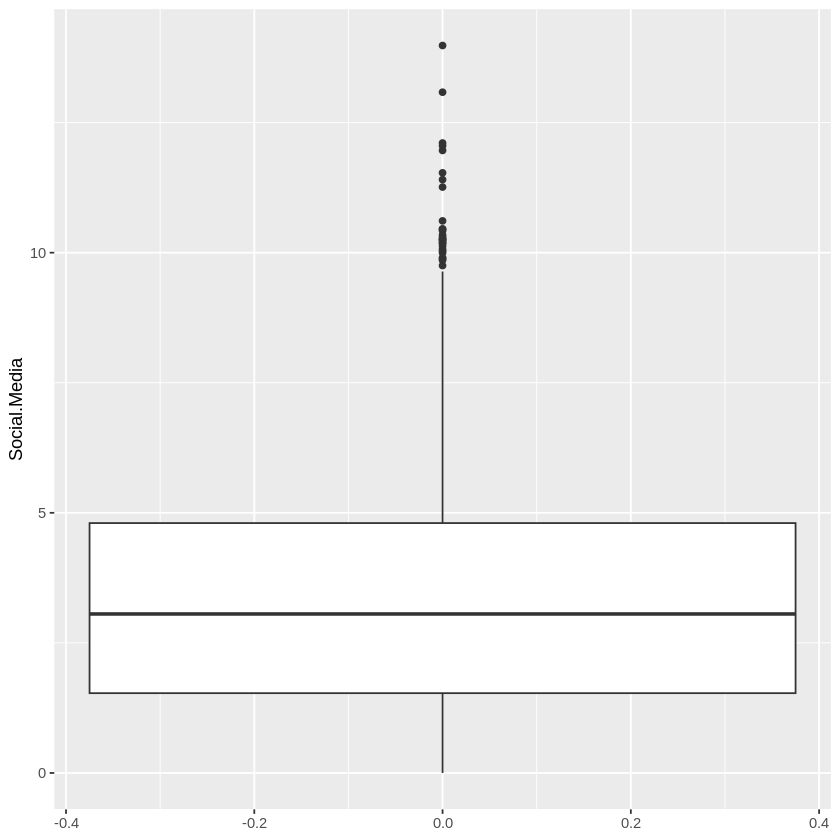

In [15]:


# Create boxplot for TV column
ggplot(clean_data, aes(y = TV)) + 
  geom_boxplot()

# Create boxplot for Social Media column
ggplot(clean_data, aes(y = Social.Media)) + 
  geom_boxplot()

# Identify outliers in TV column
tv_outliers <- boxplot.stats(clean_data$TV)$out
print(paste("Number of outliers in TV column: ", length(tv_outliers)))

# Identify outliers in Social Media column
sm_outliers <- boxplot.stats(clean_data$Social.Media)$out
print(paste("Number of outliers in Social Media column: ", length(sm_outliers)))


In [16]:
# Remove outliers from TV column
clean_data <- clean_data[!clean_data$TV %in% tv_outliers, ]

# Remove outliers from Social Media column
clean_data <- clean_data[!clean_data$Social.Media %in% sm_outliers, ]


#Question 8:
Begin your hierarchical regression by creating a model with just TV as a predictor. Report the model’s formula (i.e., with the coefficients you obtain) and R2
 statistic. You are allowed to use lm().





In [18]:
modeltv <- lm(Sales ~ TV, data = clean_data)
summary(modeltv)



Call:
lm(formula = Sales ~ TV, data = clean_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-191.214  -33.738    0.923   32.810  178.718 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 192.11958    1.70291   112.8   <2e-16 ***
TV            3.54897    0.02846   124.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.72 on 4494 degrees of freedom
Multiple R-squared:  0.7758,	Adjusted R-squared:  0.7758 
F-statistic: 1.555e+04 on 1 and 4494 DF,  p-value: < 2.2e-16


In [40]:
summary(modeltv)$r.squared

[1] 0.7758355

In [29]:
#the formula for the model is:

Sales_TV <- 192.1196 + 3.5490 * clean_data$TV


#The R2 statistic for modeltv is 0.7758

#Question 9:
Repeat the previous question, but include Social Media as a predictor.





In [42]:
modeltvsm <- lm(Sales ~ TV + Social.Media, data = clean_data)
summary(modeltvsm)



Call:
lm(formula = Sales ~ TV + Social.Media, data = clean_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-191.344  -33.821    0.851   32.845  178.498 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  192.23755    1.74750 110.007   <2e-16 ***
TV             3.55426    0.03344 106.288   <2e-16 ***
Social.Media  -0.12301    0.40823  -0.301    0.763    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.72 on 4493 degrees of freedom
Multiple R-squared:  0.7758,	Adjusted R-squared:  0.7757 
F-statistic:  7775 on 2 and 4493 DF,  p-value: < 2.2e-16


In [43]:
summary(modeltvsm)$r.squared

[1] 0.7758401

In [39]:
#The formula for the modeltvsm is:
Sales_tvsm<-192.24+3.55*clean_data$TV-0.12*clean_data$Social.Media

#The R2 0.7758

#Question 10:
Conduct a test to evaluate whether social media significantly improves the fit of the model. Use of anova() is prohibited.





In [45]:
SSR_full <- sum(resid(modeltvsm)^2)
SSR_reduced <- sum(resid(modeltv)^2)
df_full <- df.residual(modeltvsm)
df_reduced <- df.residual(modeltv)
F_stat <- ((SSR_reduced - SSR_full) / (df_reduced - df_full)) / (SSR_full / df_full)
F_stat

[1] 0.09080232

In [46]:
p_val <- 1 - pf(F_stat, df1 = 1, df2 = 4491)
p_val


[1] 0.7631736

p-value corresponding to the F-statistic of 0.0908 as approximately 0.763, greater than the conventional significance level of 0.05. Therefore, fail to reject the null hypothesis and conclude that Social.Media does not significantly improve the fit of the model beyond TV as a predictor.





# Question 11:
The type of influencer your company uses to brainwash Zoomers is catergorized in to 4 levels: Macro, Mega, Micro, and Nano. Using the preferred model determined by the previous question, incorporate Influencer as a predictor of Sales. Are its beta values significantly different than 0? What is the R2
 of this new model?





In [60]:
install.packages("fastDummies")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [76]:
library(fastDummies)


influencer_dummies <- model.matrix(~ Influencer - 1, data = clean_data)

clean_data <- cbind(clean_data, influencer_dummies)
model_all <- lm(Sales ~ TV + Social.Media + InfluencerMacro + InfluencerMega + InfluencerMicro + InfluencerNano, data = clean_data)
# Print the model summary
summary(model_all)



Call:
lm(formula = Sales ~ TV + Social.Media + InfluencerMacro + InfluencerMega + 
    InfluencerMicro + InfluencerNano, data = clean_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-180.101  -30.002    0.272   29.233  191.238 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     189.24789    1.79863 105.218   <2e-16 ***
TV                2.90875    0.03793  76.680   <2e-16 ***
Social.Media      0.12463    0.37393   0.333    0.739    
InfluencerMacro  72.00626    2.45449  29.337   <2e-16 ***
InfluencerMega   45.49440    2.17033  20.962   <2e-16 ***
InfluencerMicro  29.80547    1.96691  15.153   <2e-16 ***
InfluencerNano         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.52 on 4490 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.812 
F-statistic:  3885 on 5 and 4490 DF,  p-value: < 2.2

The "NA" for the estimate, standard error, t-value, and p-value for the "Nano" level of the "Influencer" predictor in the model summary means that this level was treated as the reference level for the factor variable "Influencer" in the model, and its coefficient estimate was not reported. In this case, the "Nano" level was likely chosen as the reference level, and its coefficient estimate was not reported because it is redundant with the intercept term in the model. The intercept term in the model represents the estimated mean response for the reference level of all predictor variables, including the reference level of "Influencer".The output of the summary indicates that the intercept, TV, InfluencerMacro, InfluencerMega, and InfluencerMicro coefficients are significantly different from 0, as their p-values are less than 0.05. However, the coefficient for Social.Media is not significantly different from 0, as its p-value is 0.739.

The R-squared for the new model is 0.8122, indicating that about 81.22% of the variance in Sales can be explained by the predictor variables in the model. The Adjusted R-squared is 0.812, which is very close to the R-squared value, suggesting that the additional predictors (InfluencerMacro, InfluencerMega, InfluencerMicro, and Social.Media) do not improve the fit of the model significantly.

#Question 12:
Conduct a F-test to evaluate whether influencer significantly improves the fit of the model. Use of anova() is prohibited. Which is the preferred model?





In [78]:
SSR_full <- sum(resid(model_all)^2)
SSR_reduced <- sum(resid(modeltvsm)^2)
df_full <- df.residual(model_all)
df_reduced <- df.residual(modeltvsm)
F_stat <- ((SSR_reduced - SSR_full) / (df_reduced - df_full)) / (SSR_full / df_full)
F_stat


[1] 290.0806

Reject the null hypothesis that the beta coefficients for the Influencer variables are zero, F_stat indicating that the Influencer variable is a significant predictor of Sales. The preferred model is the one that includes the Influencer variable, as it has a higher R-squared value and is a better fit for the data.

#Question 13:
Repeat the previous question, but use an inverse Bayes Factor to determine which least-squares model is preferred.
- Report the inverse Bayes Factor
- State whether the conclusion is the same as the F-test.





In [85]:
# Fit models with and without Influencer
model_no_infl <- lm(Sales ~ TV + Social.Media, data = clean_data)
model_infl <- lm(Sales ~ TV + Social.Media + Influencer, data = clean_data)

# Calculate BIC for both models
BIC_no_infl <- BIC(model_no_infl)
BIC_infl <- BIC(model_infl)

# Calculate the Bayes Factor
BF <- exp((BIC_no_infl - BIC_infl) / 2)

# Calculate the inverse Bayes Factor
IBF <- 1 / BF


# Print the inverse Bayes Factor
cat("Inverse Bayes Factor:", IBF, "\n")



Inverse Bayes Factor: 3.330616e-168 


In [86]:
# Conduct F-test
RSS_no_infl <- sum(model_no_infl$residuals^2)
RSS_infl <- sum(model_infl$residuals^2)
df_diff <- nrow(clean_data) - length(model_infl$coefficients) - 1
F <- ((RSS_no_infl - RSS_infl) / df_diff) / (RSS_infl / (nrow(clean_data) - ncol(clean_data) - 1))
p_value <- pf(F, df_diff, nrow(clean_data) - ncol(clean_data) - 1, lower.tail = FALSE)

# Print the F-test results
cat("F-statistic:", F, "\n")
cat("p-value:", p_value, "\n")

# Compare results
if (IBF > 1) {
  cat("The model with Influencer is preferred over the model without Influencer. \n")
} else {
  cat("The model without Influencer is preferred over the model with Influencer. \n")
}

F-statistic: 0.1921339 
p-value: 1 
The model without Influencer is preferred over the model with Influencer. 


# Question 14:
Using the preferred model from the previous question. Create a plot of the residuals to evaluate homogeneity of variance. Is the assumption reasonable?





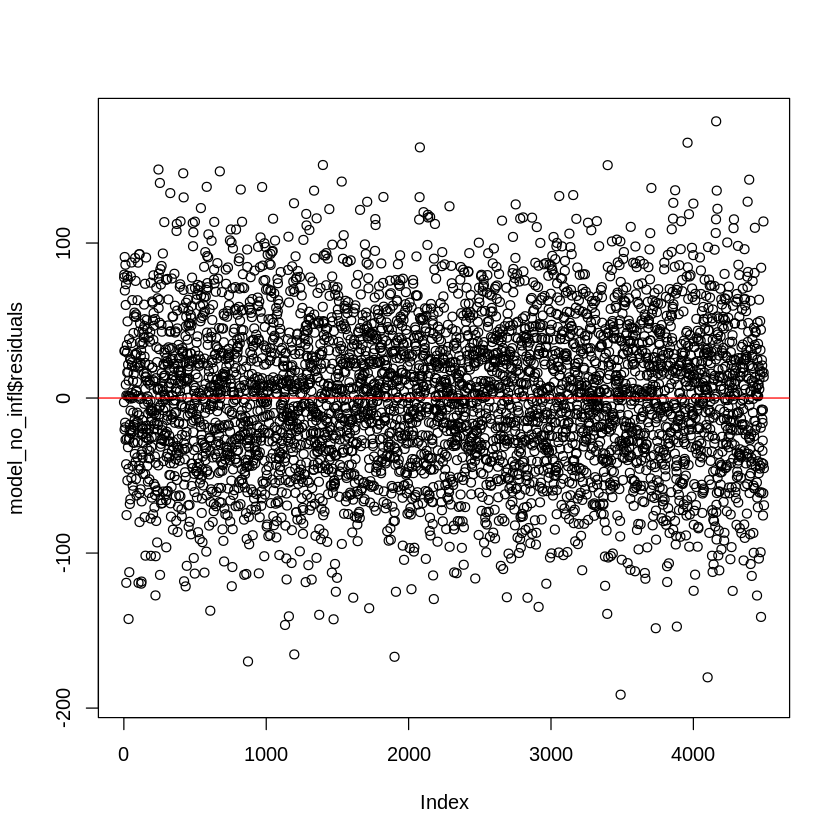

In [88]:
plot(model_no_infl$residuals)
plot(model_no_infl$residuals)
abline(h = 0, col = "red")



It appears that the dots are spread out fairly evenly across the line; indicating is fair to assume homogeneity of variance.

#Question 15:
Using the preferred model. Evaluate whether the residuals are normally distributed. Is the assumption satisifed?





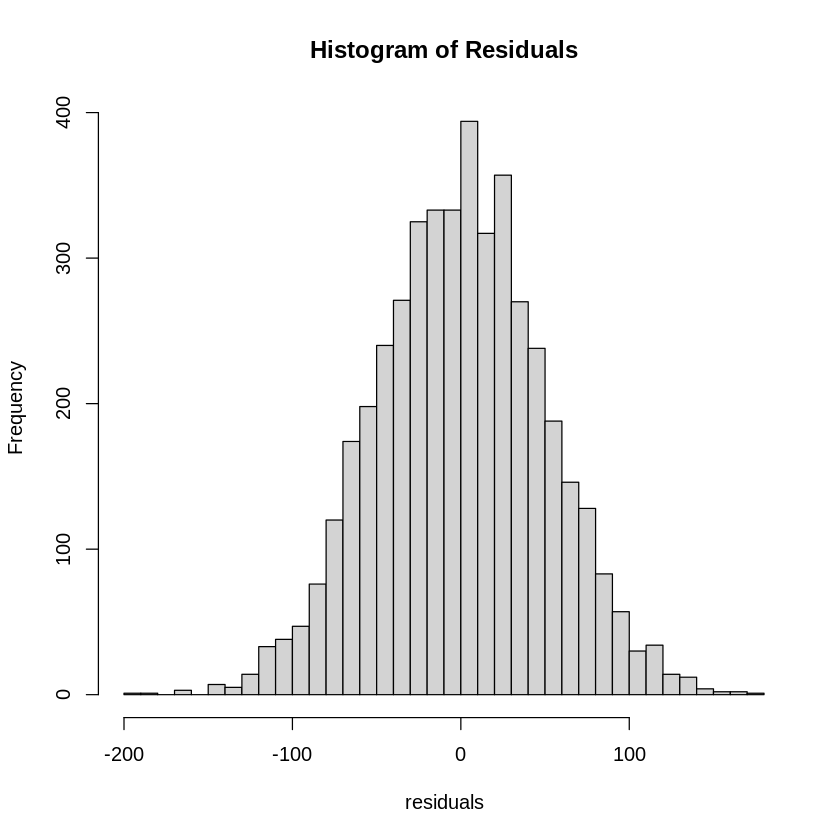

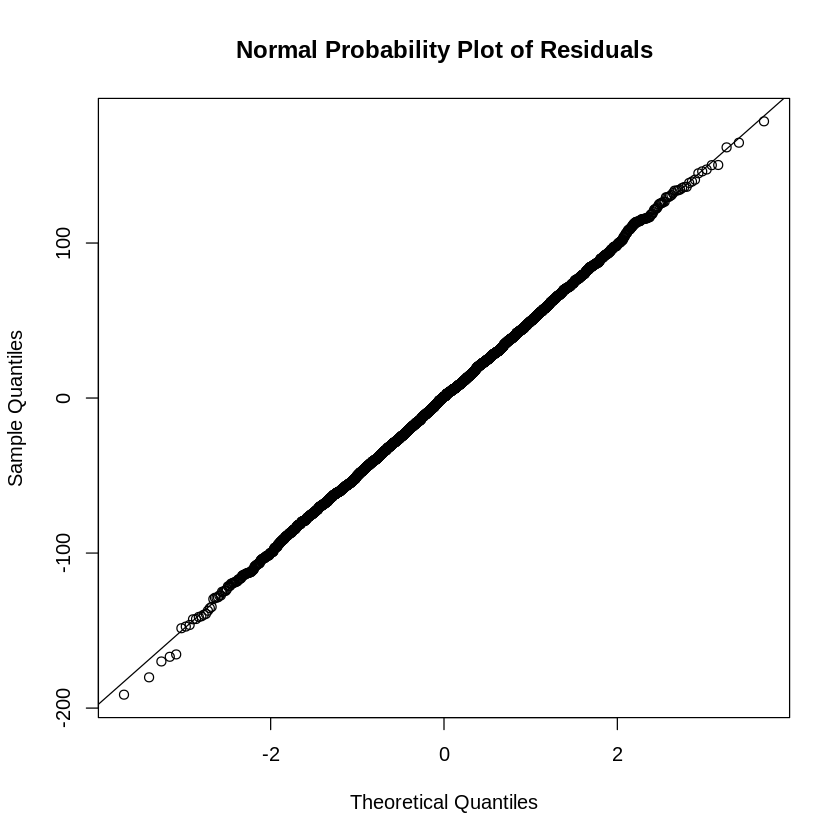

In [90]:
# Extract residuals from the model
residuals <- residuals(model_no_infl)

# Create histogram of residuals
hist(residuals, breaks = 30, main = "Histogram of Residuals")

# Create normal probability plot of residuals
qqnorm(residuals, main = "Normal Probability Plot of Residuals")
qqline(residuals)


the histogram appears roughly bell-shaped and the points in the normal probability plot follows a straight line, hence the assumption of normality is reasonable

#Question 16:
The data “prisonBrain.csv” shows the results of an experiment was performed to see whether sensory deprivation over an extended period of time has any effect on the alpha-wave patterns produced by the brain. To determine this, 20 subjects (inmates in a Canadian prison) were randomly split into two groups. Members of one group were placed in solitary confinement. Those in the other group were allowed to remain in their own cells. Seven days later, alpha-wave frequencies were measured for all subjects.
Source: P. Gendreau et al., “Changes in EEG Alpha Frequency and Evoked Response Latency During Solitary Confinement,” Journal of Abnormal Psychology 79 [1972]: 54–59)
Find a way to convert the prisonBrain.csv dataset into the “tidy format” layout. Note: there is no one single way to do this, just find a way that works and print the results.

In [97]:
install.packages("tidyr")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [96]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [132]:
library(tidyr)

prisonBrain <- read.csv("prisonBrain.csv")
prisonBrain


NonConfined,Confined
<dbl>,<dbl>
10.7,9.6
10.7,10.4
10.4,9.7
10.9,10.3
10.5,9.2
10.3,9.3
9.6,9.9
11.1,9.5
11.2,9.0


In [137]:
# create vectors for the two conditions
nonconfined <- rep("NonConfined", 10)
confined <- rep("Confined", 10)

# combine the two condition vectors
condition <- c(nonconfined, confined)

# stack the Alphawave columns
alphawaves <- c(10.7, 10.7, 10.4, 10.9, 10.5, 10.3, 9.6, 11.1, 11.2, 10.4, 9.6, 10.4, 9.7, 10.3, 9.2, 9.3, 9.9, 9.5, 9, 10.9)

# create a vector for the subject IDs
subject <- rep(1:10, 2)

# combine the three vectors into a dataframe
prisonBrain_tidy <- data.frame(Subject = subject, Condition = condition, AlphaWave = alphawaves)
prisonBrain_tidy


Subject,Condition,AlphaWave
<int>,<chr>,<dbl>
1,NonConfined,10.7
2,NonConfined,10.7
3,NonConfined,10.4
4,NonConfined,10.9
5,NonConfined,10.5
6,NonConfined,10.3
7,NonConfined,9.6
8,NonConfined,11.1
9,NonConfined,11.2


In [138]:
prisonBrain_tidy <- prisonBrain_tidy %>% arrange(Condition)
prisonBrain_tidy


Subject,Condition,AlphaWave
<int>,<chr>,<dbl>
1,Confined,9.6
2,Confined,10.4
3,Confined,9.7
4,Confined,10.3
5,Confined,9.2
6,Confined,9.3
7,Confined,9.9
8,Confined,9.5
9,Confined,9.0
